### **Nombre**: Jorge Luis Tapia Peñaloza
### **N Cuenta:** A01793013
### **Materia:** Ciencia y analítica de datos (Gpo 10)
### **Profesor:** María de la Paz Rico Fernández
### **Fecha:** 01-11-22

# Libraries

Primero que todo importamos las librerias que usaremos en este ejercicio

In [82]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
pd.set_option("display.max_columns", 200)
sns.set_style("whitegrid")

# Activity

Sigue las instrucciones y desarrolla en un cuaderno en Jupyter o Google Colab (o IDE de tu preferencia) cada uno de los puntos indicados para completar y documentar la actividad con el conjunto de datos proporcionado.

Visualización de los datos

Considera los siguientes artículos para desarrollar tu actividad:

Shanthababu, P. (2021). Effective Data Visualization Techniques in Data Science Using Python. Analytics Vidhya. Recuperado de: https://www.analyticsvidhya.com/blog/2021/08/effective-data-visualization-techniques-in-data-science-using-python/Enlaces a un sitio externo.

Rajbangshi, A. (2020). Importance of Data Storytelling in Data Science. Artificial Intelligence in Plain English. Recuperado de: https://ai.plainenglish.io/importance-of-data-storytelling-in-data-science-494f49273027Enlaces a un sitio externo.

Das, A. (2020). Data Visualization in Data Science. Towards Data Science. Recuperado de: https://towardsdatascience.com/data-visualization-in-data-science-5681cbdde5bfEnlaces a un sitio externo.

Descarga los datosEnlaces a un sitio externo. y carga el dataset en tu libreta. Descripción aquí. 
*¨Obten la información del DataFrame con los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()
* Limpia los datos eliminando los registros nulos o rellena con la media de la columna
* Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión
* Realiza el conteo de las variables categóricas
* Escala los datos, si consideras necesario
* Reduce las dimensiones con PCA, si consideras necesario.
* Indica la varianza de los datos explicada por cada componente seleccionado. Para actividades de exploración de los datos la varianza > 70%
* Indica la importancia de las variables en cada componente
* Elabora los histogramas de los atributos para visualizar su distribución
* Realiza la visualización de los datos usando por lo menos 3 gráficos que consideres adecuados: plot, scatter, jointplot, boxplot, areaplot, pie chart, pairplot, bar chart, etc.
* Interpreta y explica cada uno de los gráficos indicando cuál es la información más relevante que podría ayudar en el proceso de toma de decisiones.

# Load Data

Nos traemos el diccionario de datos para entender completamente el contexto de los datos

*Data Set Information:*

*This research aimed at the case of customers default payments in Taiwan and compares the predictive accuracy of probability of default among six data mining methods. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. Because the real probability of default is unknown, this study presented the novel â€œSorting Smoothing Methodâ€ to estimate the real probability of default. With the real probability of default as the response variable (Y), and the predictive probability of default as the independent variable (X), the simple linear regression result (Y = A + BX) shows that the forecasting model produced by artificial neural network has the highest coefficient of determination; its regression intercept (A) is close to zero, and regression coefficient (B) to one. Therefore, among the six data mining techniques, artificial neural network is the only one that can accurately estimate the real probability of default.*


*Attribute Information:*

*This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:*
* *X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.* 
* *X2: Gender (1 = male; 2 = female).* 
* *X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).* 
* *X4: Marital status (1 = married; 2 = single; 3 = others).* 
* *X5: Age (year).* 
* *X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.*
* *X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.* 
* *X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.*


*Relevant Papers:*

*Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.*



Citation Request:

*Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, 36(2), 2473-2480.*


Leemos los datos directamente desde la url

In [2]:
path = "https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv"

In [3]:
data = pd.read_csv(path)

# Check data

Creamos un diccionario para renombrar las variables basado en lo que significan, para que sea más sencillo a la hora de analizar los datos

In [4]:

months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] 

In [5]:
rename_features = {"X1":"credit_amount","X2":"gender","X3":"education","X4": "marital_status", "X5": "age"}
rename_features.update({f"X{i}": f"status_payment_{month}" for i,month in zip(range(6,12),months[3:9][::-1])})
rename_features.update({f"X{i}": f"bill_stament_{month}" for i,month in zip(range(12,18),months[3:9][::-1])})
rename_features.update({f"X{i}": f"payment_stament_{month}" for i,month in zip(range(18,24),months[3:9][::-1])})

In [6]:

rename_features

{'X1': 'credit_amount',
 'X2': 'gender',
 'X3': 'education',
 'X4': 'marital_status',
 'X5': 'age',
 'X6': 'status_payment_September',
 'X7': 'status_payment_August',
 'X8': 'status_payment_July',
 'X9': 'status_payment_June',
 'X10': 'status_payment_May',
 'X11': 'status_payment_April',
 'X12': 'bill_stament_September',
 'X13': 'bill_stament_August',
 'X14': 'bill_stament_July',
 'X15': 'bill_stament_June',
 'X16': 'bill_stament_May',
 'X17': 'bill_stament_April',
 'X18': 'payment_stament_September',
 'X19': 'payment_stament_August',
 'X20': 'payment_stament_July',
 'X21': 'payment_stament_June',
 'X22': 'payment_stament_May',
 'X23': 'payment_stament_April'}

Realizamos un head para darle un vistazo rápido a los datos, un shape para ver las dimensiones de la tabla y finalmente un info junto con un describe con la finalidad de ver el tipo de dato en el que vienen y sus distribución de los datos

In [7]:
data.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

In [8]:
data.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,-2.0,-2.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [9]:
data.shape

(30000, 25)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

In [11]:
data.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

Renombramos cada variable a su nombre correspondiente

In [12]:
data.rename(columns = rename_features,inplace = True)

Por el info y describe vemos que faltan valores en algunas variables. Por lo tanto calculamos el número de valores faltantes. Lo calculamos a nivel porcentual y absoluto

In [13]:
data.isnull().sum()/data.shape[0]

ID                           0.000000
credit_amount                0.000000
gender                       0.000033
education                    0.000067
marital_status               0.000067
age                          0.000167
status_payment_September     0.000100
status_payment_August        0.000167
status_payment_July          0.000233
status_payment_June          0.000300
status_payment_May           0.000533
status_payment_April         0.000467
bill_stament_September       0.000367
bill_stament_August          0.000367
bill_stament_July            0.000433
bill_stament_June            0.000500
bill_stament_May             0.000567
bill_stament_April           0.000333
payment_stament_September    0.000267
payment_stament_August       0.000300
payment_stament_July         0.000267
payment_stament_June         0.000367
payment_stament_May          0.000367
payment_stament_April        0.000167
Y                            0.000100
dtype: float64

In [14]:
data.isnull().sum()

ID                            0
credit_amount                 0
gender                        1
education                     2
marital_status                2
age                           5
status_payment_September      3
status_payment_August         5
status_payment_July           7
status_payment_June           9
status_payment_May           16
status_payment_April         14
bill_stament_September       11
bill_stament_August          11
bill_stament_July            13
bill_stament_June            15
bill_stament_May             17
bill_stament_April           10
payment_stament_September     8
payment_stament_August        9
payment_stament_July          8
payment_stament_June         11
payment_stament_May          11
payment_stament_April         5
Y                             3
dtype: int64

Si removemos todos los registros con valores nulos al final conservaremos el 99.86% de los datos, por lo tanto  decidimos removerlos

In [15]:
data.dropna().shape[0]/data.shape[0]

0.9986

In [16]:
data.dropna(inplace = True)

In [17]:
data.reset_index(drop = True,inplace = True)

In [18]:
data.describe()

,ID,credit_amount,gender,education,marital_status,age,status_payment_September,status_payment_August,status_payment_July,status_payment_June,status_payment_May,status_payment_April,bill_stament_September,bill_stament_August,bill_stament_July,bill_stament_June,bill_stament_May,bill_stament_April,payment_stament_September,payment_stament_August,payment_stament_July,payment_stament_June,payment_stament_May,payment_stament_April,Y
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,15005.550504,167555.900928,1.604012,1.853094,1.551739,35.483443,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,-0.291575,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025,0.221143
std,8654.547473,129737.299088,0.489070,0.790471,0.521952,9.214319,1.123989,1.197171,1.196026,1.168419,1.132307,1.149303,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767,0.415023
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7516.250000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3559.250000,2984.000000,2.664750e+03,2327.500000,1762.250000,1256.000000,1000.000000,8.352500e+02,390.000000,296.250000,253.250000,118.000000,0.000000
50%,15005.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22379.000000,21194.500000,2.008550e+04,19037.500000,18104.500000,17067.500000,2100.000000,2.009000e+03,1800.000000,1500.000000,1500.000000,1500.000000,0.000000
75%,22497.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67190.000000,64027.750000,6.018300e+04,54551.250000,50220.750000,49234.750000,5007.000000,5.000000e+03,4511.500000,4014.750000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000,1.000000


Creamos listas de las variables continuas y categoricas

In [19]:
categorical_features = ["gender","education","marital_status",'status_payment_September', 'status_payment_August',  'status_payment_July',  'status_payment_June',  'status_payment_May',  'status_payment_April',]
ignore_features = ["ID"]
target = "Y"
continuous_features = [feat for feat in list(data.columns) if feat not in categorical_features + ignore_features + [target]]

In [20]:
continuous_features

['credit_amount',
 'age',
 'bill_stament_September',
 'bill_stament_August',
 'bill_stament_July',
 'bill_stament_June',
 'bill_stament_May',
 'bill_stament_April',
 'payment_stament_September',
 'payment_stament_August',
 'payment_stament_July',
 'payment_stament_June',
 'payment_stament_May',
 'payment_stament_April']

In [21]:
percentiles = list(np.arange(.01,.1,.01))
percentiles += list(np.arange(.1,1,.1))
percentiles += list(np.arange(.91,1,.01))

Realizamos un analisis de la distribución de cada variable continua para ver si existe algún comportamiento extraño.

Se puede notar que las variables con prefijo **"bill"**  tienen valores negativos lo cual es un comportamiento extraño.

In [22]:
data[continuous_features].describe(percentiles = percentiles)

,credit_amount,age,bill_stament_September,bill_stament_August,bill_stament_July,bill_stament_June,bill_stament_May,bill_stament_April,payment_stament_September,payment_stament_August,payment_stament_July,payment_stament_June,payment_stament_May,payment_stament_April
count,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000,2.995800e+04,29958.000000,29958.000000,29958.000000,29958.000000
mean,167555.900928,35.483443,51248.119901,49200.493825,4.703239e+04,43279.335370,40328.984578,38889.925763,5664.614460,5.925715e+03,5228.429969,4829.873556,4801.481574,5220.708025
std,129737.299088,9.214319,73674.949943,71211.232744,6.938524e+04,64364.684347,60826.219326,59582.883301,16568.823518,2.305598e+04,17617.338167,15676.205514,15285.552652,17788.983767
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
1%,10000.000000,22.000000,-81.000000,-200.000000,-2.000000e+02,-212.000000,-230.290000,-330.430000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2%,20000.000000,22.000000,0.000000,-4.000000,-3.000000e+00,-3.000000,-3.000000,-6.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
3%,20000.000000,23.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
4%,20000.000000,23.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
5%,20000.000000,23.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
6%,20000.000000,24.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


El porcentaje de estos valores es cerca del 2%. Este descubrimiento se puede deber a que los datos corresponden a que el cliente tiene un saldo a favor por lo que el valor de pago aparace en negativo. Simplente para homogeneisar el comportamiento los toparemos en 0.

In [23]:
(data[["bill_stament_September",	"bill_stament_August",	"bill_stament_July",	"bill_stament_June",	"bill_stament_May",	"bill_stament_April",]]<0).sum()/data.shape[0]

bill_stament_September    0.019661
bill_stament_August       0.022298
bill_stament_July         0.021831
bill_stament_June         0.022498
bill_stament_May          0.021831
bill_stament_April        0.022932
dtype: float64

In [24]:
data.loc[data["bill_stament_August"]<0, ["credit_amount","payment_stament_August","status_payment_August","bill_stament_August",target]]

,credit_amount,payment_stament_August,status_payment_August,bill_stament_August,Y
25,60000,1000.0,-2.0,-425.0,1.0
34,160000,396.0,-1.0,-131.0,0.0
64,130000,0.0,-2.0,-9850.0,0.0
97,380000,33178.0,-2.0,-303.0,0.0
105,360000,0.0,-2.0,-103.0,0.0
...,...,...,...,...,...
29741,50000,10000.0,-2.0,-1935.0,0.0
29742,100000,4000.0,0.0,-1478.0,0.0
29803,10000,5500.0,-2.0,-265.0,1.0
29868,310000,1003.0,-2.0,-223.0,0.0


In [25]:
data[["bill_stament_September",	"bill_stament_August",	"bill_stament_July",	"bill_stament_June",	"bill_stament_May",	"bill_stament_April",]] = data[["bill_stament_September",	"bill_stament_August",	"bill_stament_July",	"bill_stament_June",	"bill_stament_May",	"bill_stament_April",]].clip(lower = 0)

En el momento de ver los valores inferiores a 0 en las variables bill, se nota que status payment contiene valores que de acuerdo al diccionario de datos no debería de tener además que los datos llegan hasta 8 cuando se supondría que deberia ser 9. Analizaremos a detalle porque ocurre eso. 

Inicialmente hacemos un describe para ver en cada variable hasta que percentil se encuentran esos datos.

In [26]:
data[categorical_features].describe(percentiles = percentiles)

,gender,education,marital_status,status_payment_September,status_payment_August,status_payment_July,status_payment_June,status_payment_May,status_payment_April
count,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000,29958.000000
mean,1.604012,1.853094,1.551739,-0.017124,-0.134021,-0.166767,-0.221110,-0.266807,-0.291575
std,0.489070,0.790471,0.521952,1.123989,1.197171,1.196026,1.168419,1.132307,1.149303
min,1.000000,0.000000,0.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
1%,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
2%,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
3%,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
4%,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
5%,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
6%,1.000000,1.000000,1.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000


Al menos hasta el 20% de los datos se encuentra con ese patrón. Validaderemos una hipotesis la cual es si es que los datos vienen con un valor menos a su escala es decir, que 0 sea 1 mes de retraso, 1 sean dos meses , etc. 

In [27]:
status_feats = ["status_payment_September","status_payment_August",	"status_payment_July",	"status_payment_June",	"status_payment_May",	"status_payment_April",]

In [28]:
data.loc[data[target]==0,status_feats].describe()

,status_payment_September,status_payment_August,status_payment_July,status_payment_June,status_payment_May,status_payment_April
count,23333.000000,23333.000000,23333.000000,23333.000000,23333.000000,23333.000000
mean,-0.211632,-0.302276,-0.317019,-0.356234,-0.390220,-0.406034
std,0.952564,1.035067,1.046903,1.011950,0.976275,1.005199
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8.000000,8.000000,7.000000,8.000000,7.000000,7.000000


In [29]:
data.loc[data[target]==1,status_feats].describe()

,status_payment_September,status_payment_August,status_payment_July,status_payment_June,status_payment_May,status_payment_April
count,6625.000000,6625.000000,6625.000000,6625.000000,6625.000000,6625.000000
mean,0.667925,0.458566,0.362415,0.254792,0.167849,0.111547
std,1.383752,1.502357,1.499740,1.508726,1.482759,1.485262
min,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000
25%,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,2.000000,2.000000,2.000000,0.000000,0.000000
max,8.000000,7.000000,8.000000,8.000000,8.000000,8.000000


Al revisar varios ejemplos, realmente no se observa un comportamiento de desfase, buscamos más allá la explicacion de esto. Sin embargo, bajo la misma logica los reemplazaremos por el valor de 0 el cual nos querra decir que hubo ningún atraso. 

In [30]:
data[status_feats] = data[status_feats].clip( 0)

Reemplazamos los valores de cada variable categoricas.

In [31]:
replace_dict = {"gender": {1 : "MALE", 2 : "FEMALE"}, "education" : {1 : "graduate school", 2 : "university", 3 : "high school", 4 : "others"}, "marital_status" : {1 : "married", 2 : "single", 3 : "others"}}
for feat in replace_dict:
  data[feat] =  data[feat].map(replace_dict[feat])

Usamos el metodo map y no replace, porque queremos que los datos que no se encuentren dentro de los que definimos los mande a nulos.

In [32]:
data[categorical_features].isnull().sum()

gender                        0
education                   345
marital_status               54
status_payment_September      0
status_payment_August         0
status_payment_July           0
status_payment_June           0
status_payment_May            0
status_payment_April          0
dtype: int64

In [33]:
data["education"].value_counts(dropna = False)

university         14009
graduate school    10572
high school         4909
NaN                  345
others               123
Name: education, dtype: int64

In [34]:
data["marital_status"].value_counts(dropna = False)

single     15939
married    13643
others       322
NaN           54
Name: marital_status, dtype: int64

En este caso como tenemos la categoria de others para ambas variables, reemplazaremos los nulos por esa categoría.

In [35]:
data[["education","marital_status"]] = data[["education","marital_status"]].fillna("others")

In [36]:
data["education"].value_counts(dropna = False)

university         14009
graduate school    10572
high school         4909
others               468
Name: education, dtype: int64

In [37]:
data["marital_status"].value_counts(dropna = False)

single     15939
married    13643
others       376
Name: marital_status, dtype: int64

In [38]:
data


,ID,credit_amount,gender,education,marital_status,age,status_payment_September,status_payment_August,status_payment_July,status_payment_June,status_payment_May,status_payment_April,bill_stament_September,bill_stament_August,bill_stament_July,bill_stament_June,bill_stament_May,bill_stament_April,payment_stament_September,payment_stament_August,payment_stament_July,payment_stament_June,payment_stament_May,payment_stament_April,Y
0,1,20000,FEMALE,university,married,24.0,2.0,2.0,0.0,0.0,0.0,0.0,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,FEMALE,university,single,26.0,0.0,2.0,0.0,0.0,0.0,2.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,FEMALE,university,single,34.0,0.0,0.0,0.0,0.0,0.0,0.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,FEMALE,university,married,37.0,0.0,0.0,0.0,0.0,0.0,0.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,MALE,university,married,57.0,0.0,0.0,0.0,0.0,0.0,0.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29953,29996,220000,MALE,high school,married,39.0,0.0,0.0,0.0,0.0,0.0,0.0,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0.0
29954,29997,150000,MALE,high school,single,43.0,0.0,0.0,0.0,0.0,0.0,0.0,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0.0
29955,29998,30000,MALE,university,single,37.0,4.0,3.0,2.0,0.0,0.0,0.0,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1.0
29956,29999,80000,MALE,high school,married,41.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1.0


Finalmente podemos remover los valores extremos de cada variable continua, sin embargo solo eliminaremos los datos por encima del percentil 99 ya que no existen  valores extremos inferiores, dado que 0 es el valor minimo y es un valor común dentro de la distribución.

Agregamos la distribución de la variable objetivo para ver si no se ha modificado después de remover los valores extremos de cada variable

In [39]:
data[target].value_counts(1).round(4)

0.0    0.7789
1.0    0.2211
Name: Y, dtype: float64

In [40]:
quantiles_99 = data[continuous_features].quantile(.99)
for feat in continuous_features:
  data = data[data[feat]<quantiles_99[feat]]

Finalmente calculamos cuanto fue el porcentaje total removido con respecto al tamaño original de los datos

In [41]:

1 - data.shape[0]/30000

0.09583333333333333

Sin embargo la distribuciónde la variable objetivo no cambio por lo cual no hay ningún problema

In [42]:
data[target].value_counts(1).round(4)

0.0    0.7711
1.0    0.2289
Name: Y, dtype: float64

In [51]:
pipeline_pca = Pipeline([("scaler",StandardScaler()), ("pca",PCA()), ])

In [52]:
pipeline_pca.fit(data[continuous_features])

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA())])

In [94]:
pca = pipeline_pca["pca"]
data_pca = pd.DataFrame(pipeline_pca.transform(data[continuous_features]), columns = [f"p{i}" for i in range(pca.n_components_)])
data_scaled = pd.DataFrame(pipeline_pca["scaler"].transform(data[continuous_features]), columns = continuous_features)

In [68]:
data_pca = pd.DataFrame(zip([f"p{i}" for i in range(pca.n_components_)], pca.explained_variance_ratio_),columns = ["components","variance_ratio"])
data_pca["variance_ratio_cumsum"] = data_pca["variance_ratio"].cumsum()
data_pca

,components,variance_ratio,variance_ratio_cumsum
0,p0,0.435331,0.435331
1,p1,0.138507,0.573838
2,p2,0.074605,0.648443
3,p3,0.059079,0.707522
4,p4,0.056370,0.763892
5,p5,0.055174,0.819066
6,p6,0.053320,0.872386
7,p7,0.051691,0.924077
8,p8,0.049389,0.973467
9,p9,0.017862,0.991329


Notamos que con solo 3 componentes podemos ya tener el 70% de la varianza acumulada.

In [77]:
pd.DataFrame(pca.components_,columns = continuous_features).abs().T.style.background_gradient()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
credit_amount,0.114265,0.313783,0.384820,0.021762,0.611233,0.524813,0.289720,0.070828,0.018602,0.034574,0.016608,0.010138,0.002292,0.003048
age,0.018002,0.058883,0.901020,0.021174,0.310216,0.253955,0.147845,0.034498,0.005503,0.010637,0.000499,0.001950,0.001223,0.000030
bill_stament_September,0.372720,0.157315,0.025172,0.025458,0.056756,0.011903,0.007033,0.012192,0.010057,0.565754,0.517434,0.374956,0.312103,0.074651
bill_stament_August,0.382451,0.155046,0.013521,0.018318,0.048889,0.047979,0.016783,0.014173,0.082480,0.394124,0.040931,0.382030,0.688139,0.201756
bill_stament_July,0.387911,0.148352,0.003991,0.038775,0.024733,0.055522,0.034437,0.018788,0.047629,0.149488,0.548056,0.401471,0.515343,0.262727
bill_stament_June,0.388714,0.138251,0.006786,0.019557,0.004204,0.019181,0.076545,0.021194,0.033069,0.191607,0.460115,0.620348,0.060508,0.429721
bill_stament_May,0.384872,0.128020,0.012644,0.046060,0.056267,0.065215,0.021351,0.048000,0.019156,0.418742,0.120444,0.153479,0.311177,0.715834
bill_stament_April,0.378251,0.124576,0.015597,0.079941,0.068379,0.034738,0.011955,0.071359,0.020601,0.508877,0.438634,0.368167,0.236333,0.424824
payment_stament_September,0.153236,0.344833,0.054081,0.476126,0.064849,0.300859,0.144039,0.102667,0.698048,0.096380,0.032682,0.039070,0.052194,0.009996
payment_stament_August,0.143543,0.359819,0.073529,0.482834,0.065078,0.224102,0.219758,0.121184,0.696827,0.003485,0.069764,0.007440,0.054147,0.022808


Podemos notar como el primer componente recopila toda la informacion relacionada con las variables de Bill, el segundo con las de payment y un poco con la cantidad de credito. Finalmente el tercer componente ve la información restante.

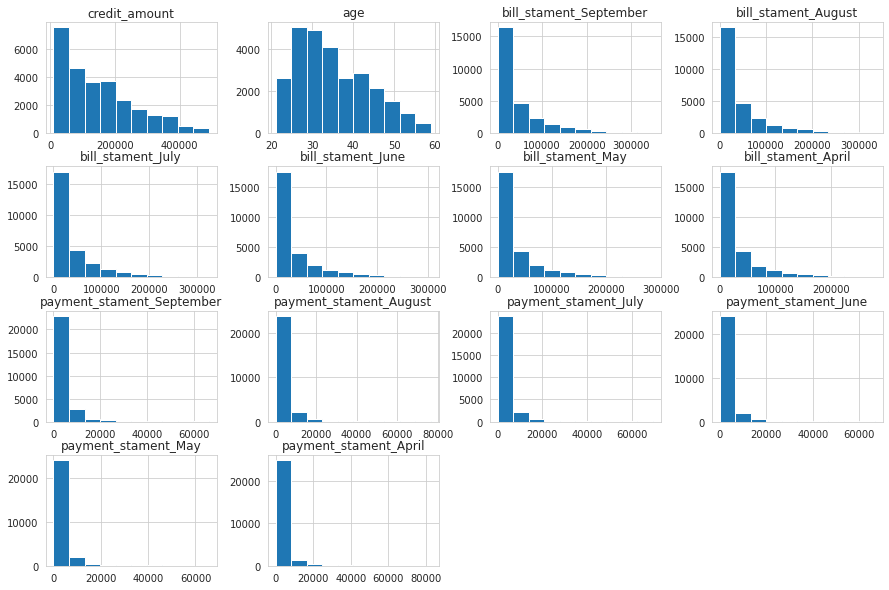

In [86]:
data[continuous_features].hist(figsize = (20,10));

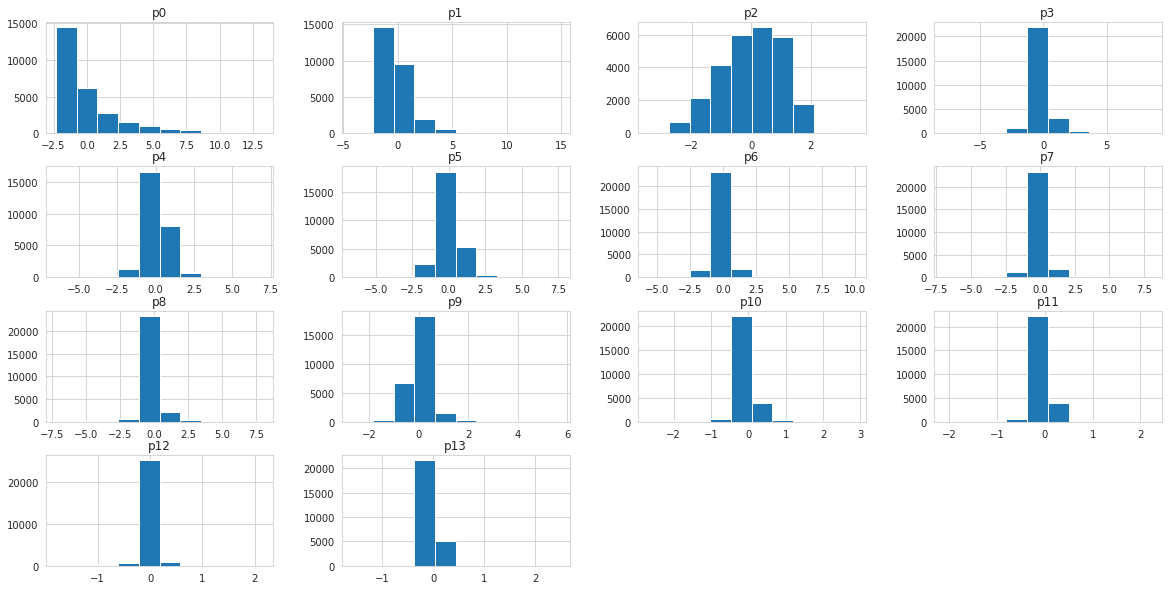

In [92]:
data_pca.hist(figsize = (20,10));

En este grafico se observa la correlación de todas las variables. 
Hallazgos más relevantes:
* La variable de edad no tiene casi ninguna correlación con ninguna variable
* Todas las variables bill tienen gran correlación por su propia naturaleza
* La cantidad de credito esta relacionada con casi todas las variables en una misma magnitud. Lo destacable es que esta levemente relacionado con el credito lo cual puede ser debido a que el banco se basa en la edad para determinar el limite de credito 

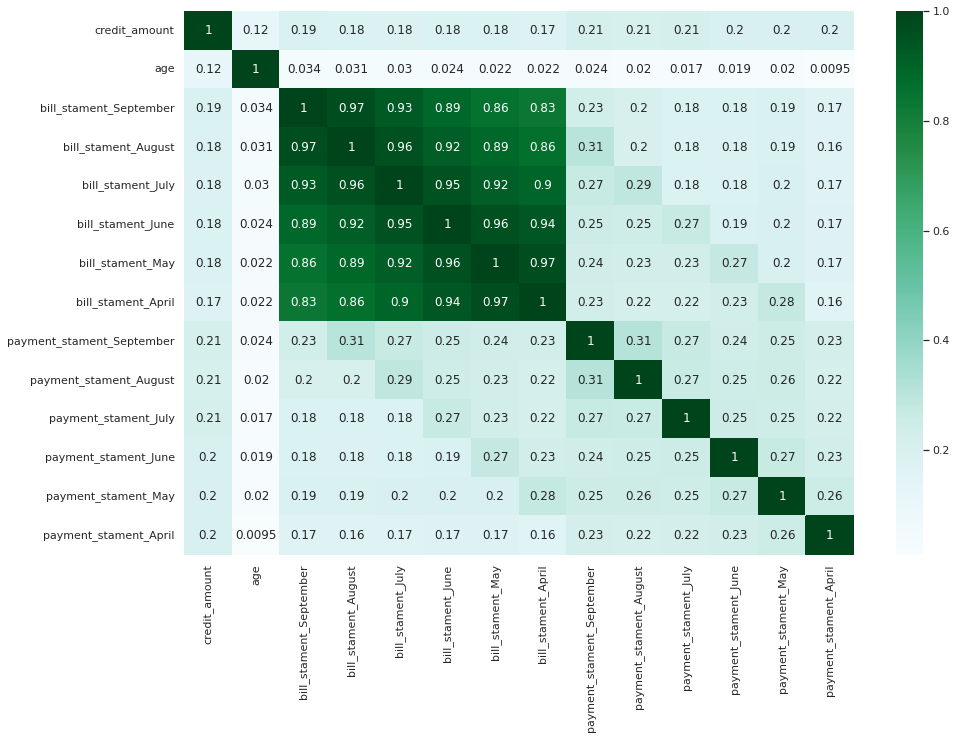

In [127]:
corrs = data[continuous_features].corr()
sns.set(rc = {'figure.figsize':(15,10)})
sns.heatmap(corrs, cmap = "BuGn", annot= True)

Dividimos en 3 grupos para ver las cajas de distribución (payment, age-credit-amount, billstament). Porque las variables de payment tienen bastantes valores extremos pero son tan frecuentes que no pueden tomarse como valores anomalos.

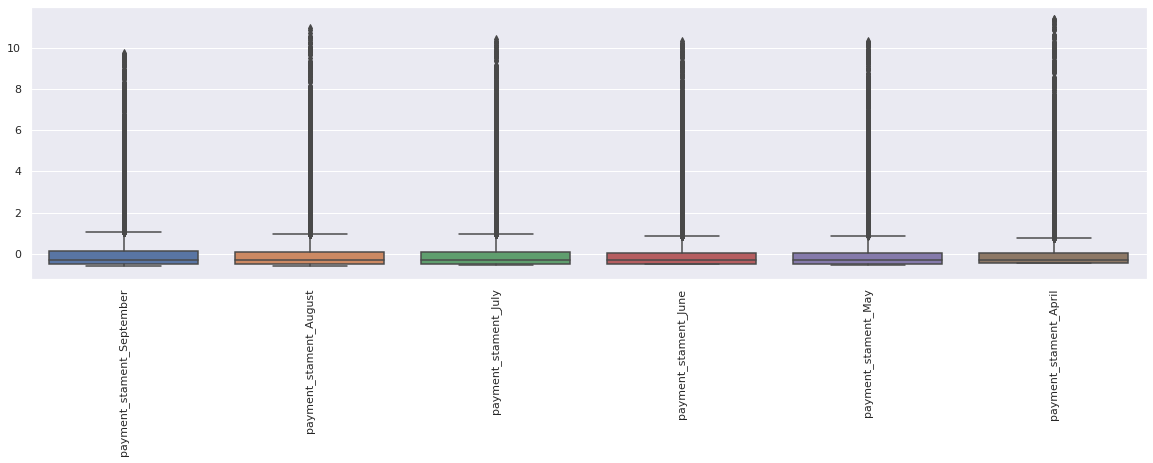

In [105]:
plt.subplots(figsize = (20,5))
sns.boxplot(data=data_scaled[["payment_stament_September",    "payment_stament_August",    "payment_stament_July",    "payment_stament_June",    "payment_stament_May",    "payment_stament_April",]])
plt.xticks(rotation = 90);

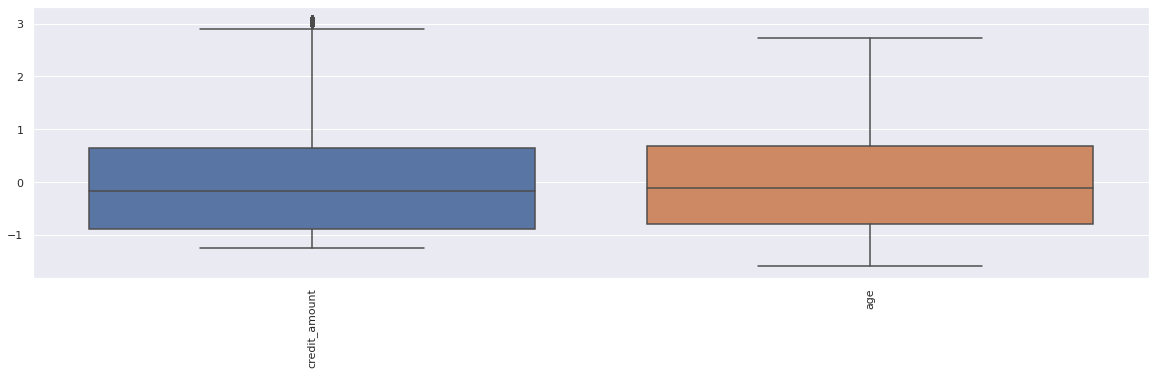

In [108]:

plt.subplots(figsize = (20,5))
sns.boxplot(data=data_scaled[["credit_amount","age"]])
plt.xticks(rotation = 90);

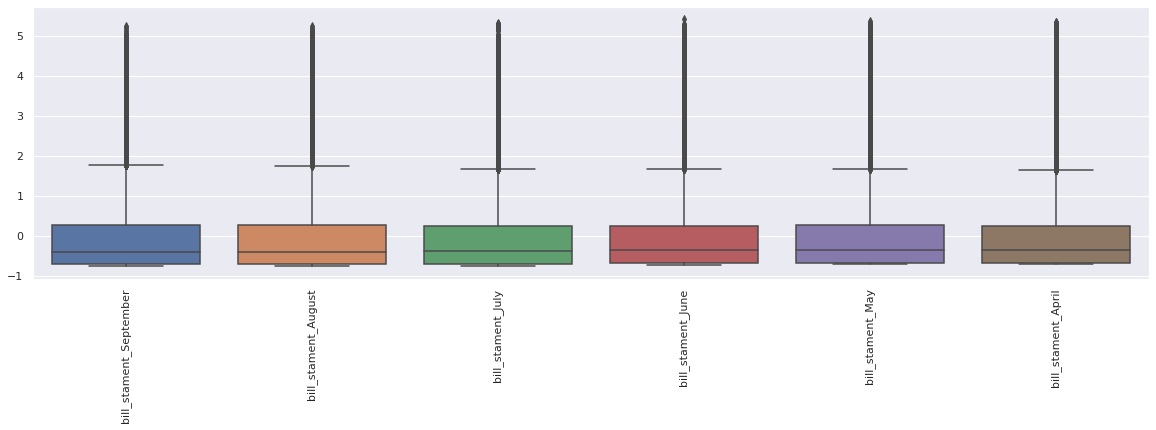

In [111]:
plt.subplots(figsize = (20,5))
sns.boxplot(data=data_scaled[["bill_stament_September", "bill_stament_August", "bill_stament_July", "bill_stament_June", "bill_stament_May", "bill_stament_April",]])
plt.xticks(rotation = 90);

In [115]:
categorical_features

['gender',
 'education',
 'marital_status',
 'status_payment_September',
 'status_payment_August',
 'status_payment_July',
 'status_payment_June',
 'status_payment_May',
 'status_payment_April']

Para las variables categoricas notamos que la tasa de la variable objetivo esta un poco desbalanceada pero tampoco esta tan marcada.

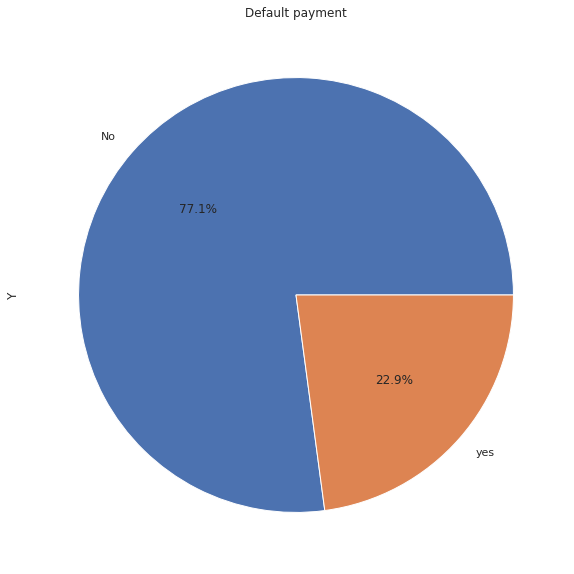

In [124]:
data[target].replace({0: "No",1: "yes"}).value_counts().plot.pie( autopct='%1.1f%%',title = "Default payment")

Para este caso podemos ver que la mayor cantidad de clientes tienen estudios universitarios, seguido de graduados y por ultimo high school

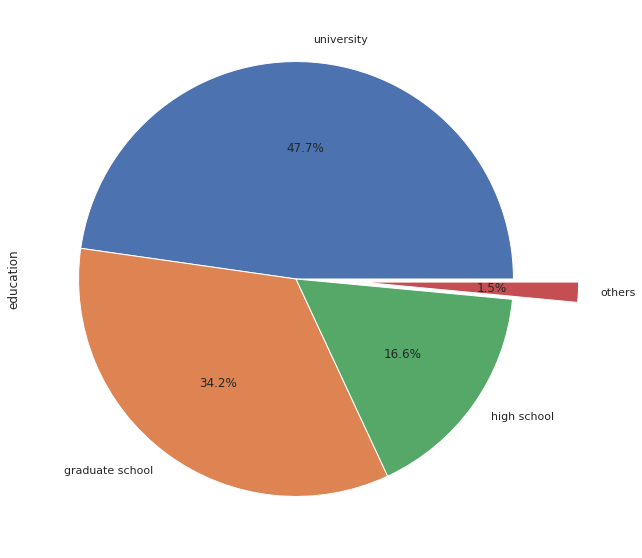

In [120]:
data["education"].value_counts().plot.pie( autopct='%1.1f%%', explode=(0, 0, 0, .30))